# Jacobsville strat columns with Pystrat


In [1]:
# standard modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from pystrat import pystrat
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

## import strat data

In [2]:
# read in your lithostratigraphy data
SC1_strat = pd.read_csv('../Data/Jacobsville_stratigraphy/SC1_strat.csv')
NW1_strat = pd.read_csv('../Data/Jacobsville_stratigraphy/NW1_srtat.csv')
NW2_strat = pd.read_csv('../Data/Jacobsville_stratigraphy/NW2_srtat.csv')
AF1_strat = pd.read_csv('../Data/Jacobsville_stratigraphy/AF1_strat.csv')

display(SC1_strat.head())
display(NW1_strat.tail())
display(NW2_strat.tail())
display(AF1_strat.head())

,Unnamed: 0,thickness,lithology,grain size,structure,note
0,0.0,5.0,basalt,igneous,NaN,"base datum basalt, arbitrary thickness"
1,0.4,0.4,sandstone,F,ripples,NaN
2,2.7,2.3,sandstone,F,trough x-beddings,NaN
3,5.5,2.8,sandstone,F,trough x-beddings,NaN
4,6.1,0.6,sandstone,VF,ripples,NaN


,0,thickness,lithology,grain size,structure,note
123,139.7,0.1,sandstone,M,NaN,NaN
124,139.8,0.1,siltstone,VF,NaN,NaN
125,141.8,2.0,cover,cover,NaN,NaN
126,142.9,1.1,conglomerate,Cobble,NaN,NaN
127,143.4,0.5,sandstone,M,NaN,NaN


,0,thickness,lithology,grain size,structure,note
10,4.24,0.60,conglomerate,Cobble,NaN,NaN
11,4.54,0.30,siltstone,VF,NaN,NaN
12,5.19,0.65,conglomerate,Cobble,NaN,NaN
13,5.22,0.03,sandstone,M,NaN,NaN
14,7.52,2.30,conglomerate,Cobble,NaN,NaN


,0,thickness,lithology,grain size,structure,note
0,0.20,0.20,conglomerate,Cobble,NaN,NaN
1,0.50,0.30,sandstone,C,NaN,NaN
2,0.60,0.10,sandstone,F,NaN,NaN
3,1.60,1.00,siltstone,F,NaN,NaN
4,1.65,0.05,conglomerate,Pebble,NaN,NaN


In [3]:
SC1_specimen_level = pd.read_csv('../Data/Jacobsville_stratigraphy/SC1_specimen_level.csv')
NW1_specimen_level = pd.read_csv('../Data/Jacobsville_stratigraphy/NW1_specimen_level.csv')
NW2_specimen_level = pd.read_csv('../Data/Jacobsville_stratigraphy/NW2_specimen_level.csv')
AF1_specimen_level = pd.read_csv('../Data/Jacobsville_stratigraphy/AF1_specimen_level.csv')

display(SC1_specimen_level.head())
display(NW1_specimen_level.tail())
display(NW2_specimen_level.tail())
display(AF1_specimen_level.head())

,specimen_name,strat_level
0,1a,5.525
1,2a,5.520
2,3a,5.570
3,4a,5.570
4,5a,5.570


,sample_name,strat_level
9,10a,32.66
10,11a,32.70
11,12a,32.74
12,13a,32.78
13,14a,32.82


,sample_name,strat_level
13,14a,0.11
14,15a,0.11
15,16a,0.11
16,17a,0.11
17,18a,0.13


,sample_name,strat_level
0,1a,0.60
1,2a,0.85
2,4a,0.92
3,5a,1.00
4,6a,1.01


## set up color and width legend charts

In [4]:
lithology = ['basalt', 'conglomerate', 'arkose', 'cover', 'sandstone', 'siltstone', 'tuff']
color = ['dimgrey', 'darkorange', 'tan', 'white', 'khaki', 'firebrick', 'lightgrey']
color_chart = pd.Series(index=lithology, data = color)
color_chart

basalt             dimgrey
conglomerate    darkorange
arkose                 tan
cover                white
sandstone            khaki
siltstone        firebrick
tuff             lightgrey
dtype: object

In [5]:
grain_size = [ 'cover', 'VF', 'F', 'M', 'C', 'VC', 'Pebble', 'Cobble', 'igneous']
widths = [0.0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.8, 0.9, 1.0]
width_chart = pd.Series(index=grain_size, data = widths)
width_chart

cover      0.00
VF         0.15
F          0.30
M          0.45
C          0.60
VC         0.75
Pebble     0.80
Cobble     0.90
igneous    1.00
dtype: float64

## make color and width references in tables

In [6]:
SC1_strat['color'] = [color_chart[i] for i in SC1_strat['lithology']]
SC1_strat['width'] = [width_chart[i] for i in SC1_strat['grain size']]

NW1_strat['color'] = [color_chart[i] for i in NW1_strat['lithology']]
NW1_strat['width'] = [width_chart[i] for i in NW1_strat['grain size']]

NW2_strat['color'] = [color_chart[i] for i in NW2_strat['lithology']]
NW2_strat['width'] = [width_chart[i] for i in NW2_strat['grain size']]

AF1_strat['color'] = [color_chart[i] for i in AF1_strat['lithology']]
AF1_strat['width'] = [width_chart[i] for i in AF1_strat['grain size']]

display(SC1_strat.head())
display(NW1_strat.head())
display(AF1_strat.head())

,Unnamed: 0,thickness,lithology,grain size,structure,note,color,width
0,0.0,5.0,basalt,igneous,NaN,"base datum basalt, arbitrary thickness",dimgrey,1.00
1,0.4,0.4,sandstone,F,ripples,NaN,khaki,0.30
2,2.7,2.3,sandstone,F,trough x-beddings,NaN,khaki,0.30
3,5.5,2.8,sandstone,F,trough x-beddings,NaN,khaki,0.30
4,6.1,0.6,sandstone,VF,ripples,NaN,khaki,0.15


,0,thickness,lithology,grain size,structure,note,color,width
0,0.6,0.6,sandstone,M,NaN,NaN,khaki,0.45
1,0.7,0.1,siltstone,VF,NaN,NaN,firebrick,0.15
2,1.4,0.7,sandstone,M,NaN,NaN,khaki,0.45
3,1.5,0.1,conglomerate,Cobble,NaN,NaN,darkorange,0.90
4,3.2,1.7,cover,cover,NaN,NaN,white,0.00


,0,thickness,lithology,grain size,structure,note,color,width
0,0.20,0.20,conglomerate,Cobble,NaN,NaN,darkorange,0.9
1,0.50,0.30,sandstone,C,NaN,NaN,khaki,0.6
2,0.60,0.10,sandstone,F,NaN,NaN,khaki,0.3
3,1.60,1.00,siltstone,F,NaN,NaN,firebrick,0.3
4,1.65,0.05,conglomerate,Pebble,NaN,NaN,darkorange,0.8


## SC1 rough strat column

In [7]:
# create a pystrat Section from the lithostratigraphy data
SC1_section = pystrat.Section(SC1_strat['thickness'], SC1_strat['lithology'])

# create a pystrat Style from the styling files
SC1_style = pystrat.Style('facies',SC1_strat['lithology'],SC1_strat['color'],
                         'facies',SC1_strat['lithology'],SC1_strat['width'],
                          0.1, 3)

stratigraphic height scaling : 1 distance unit = 1 inch * 0.1
width value of 1 will be     : 3 inches


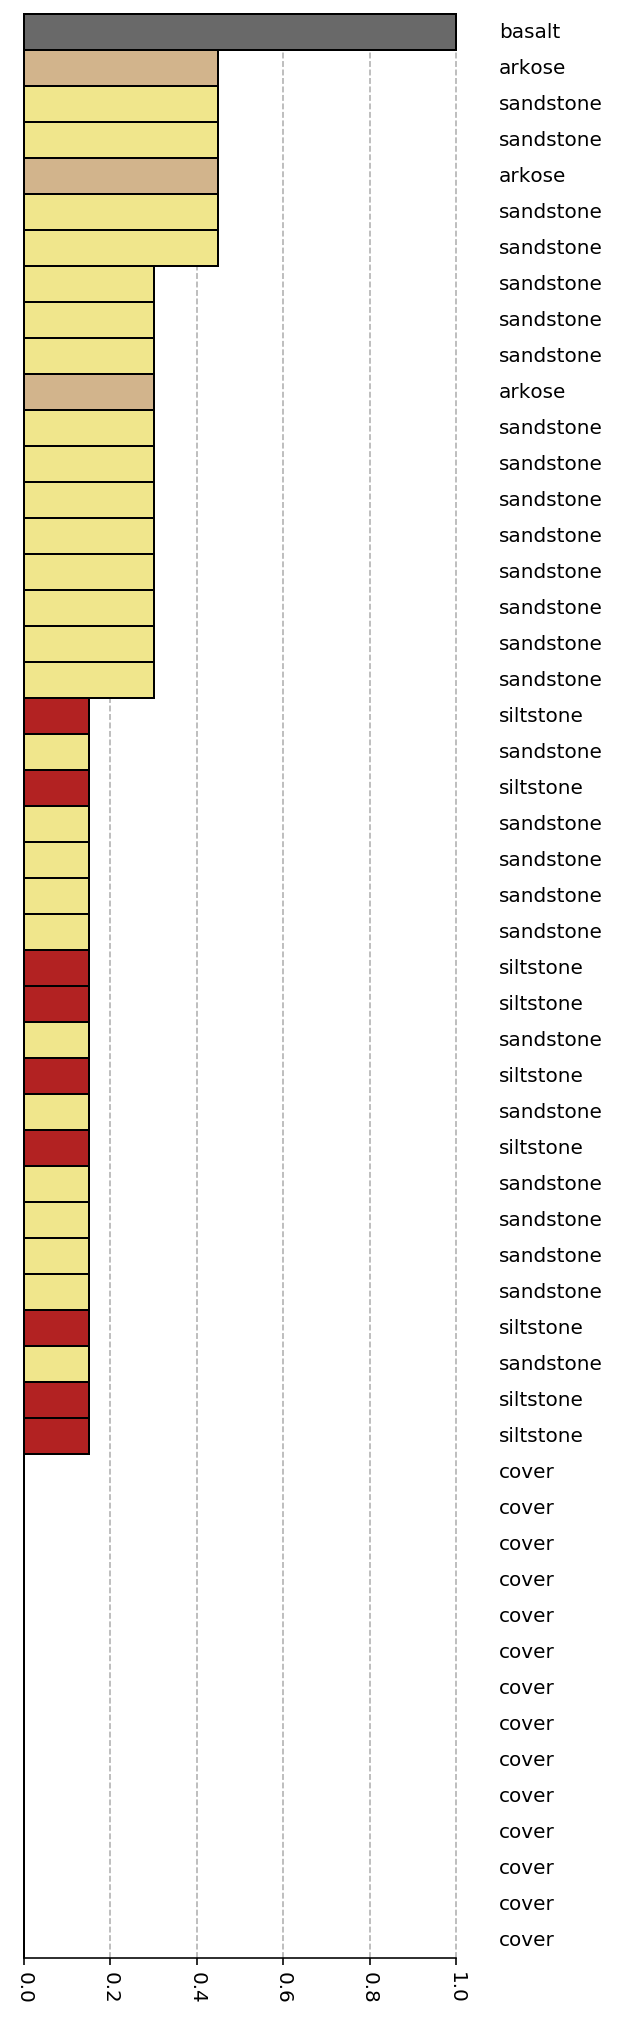

In [8]:
fig, ax = SC1_style.plot_legend()
plt.savefig('../Figures/SC1_legend.pdf', bbox_inches='tight')
plt.show(fig)

/Users/yimingzhang/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


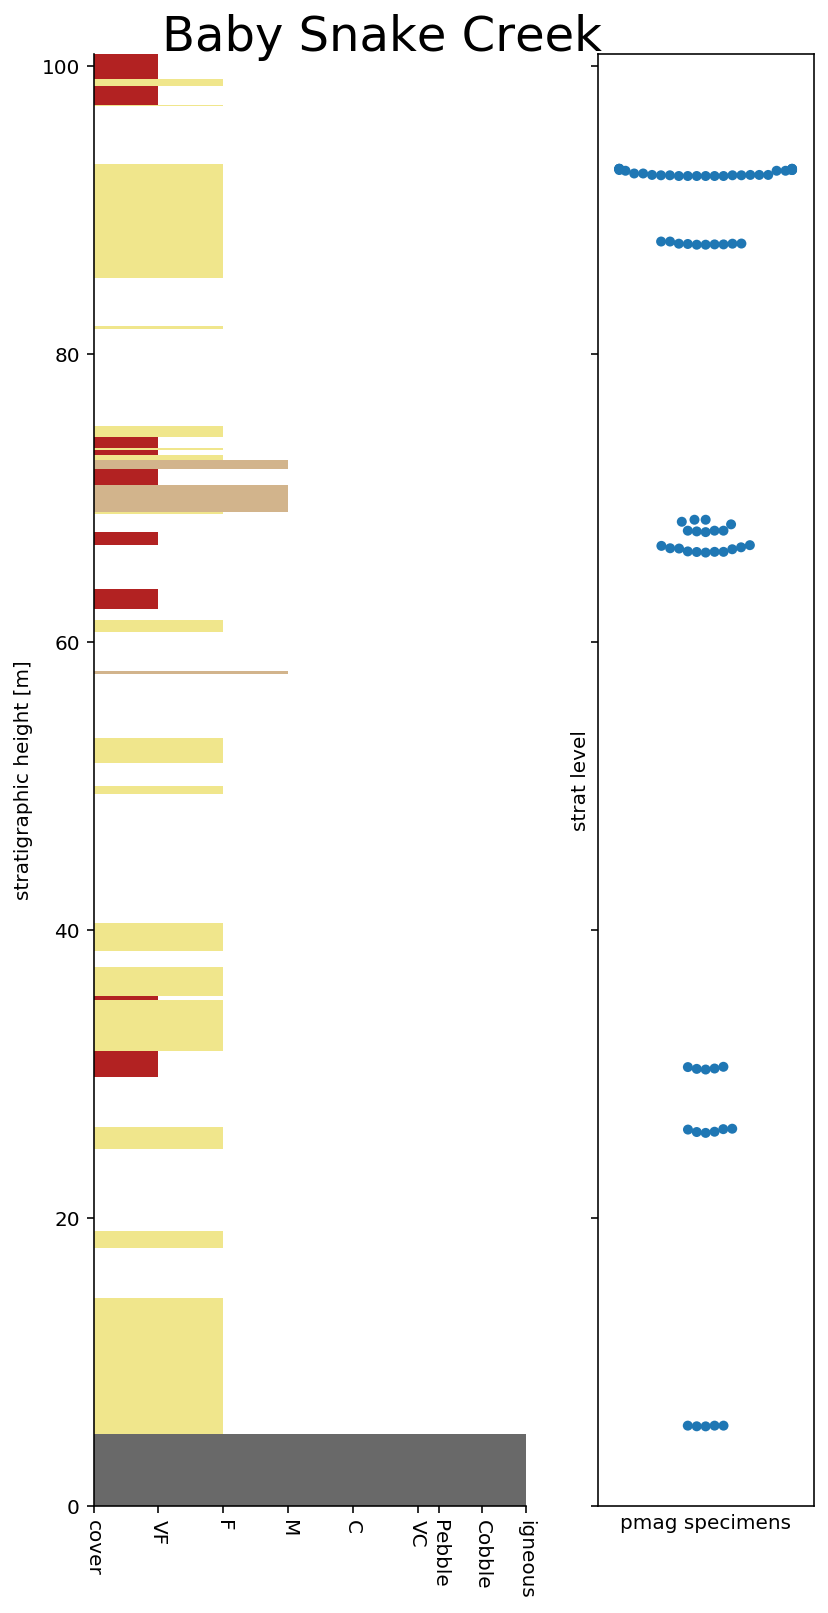

In [19]:
fig, ax = pystrat.plot_stratigraphy(SC1_section, SC1_style, ncols = 2, linewidth=0., col_widths=0.5)

ax[0].set_xticks(widths)
ax[0].set_xticklabels(grain_size)
ax[0].grid(False)


sns.swarmplot(y = SC1_specimen_level['strat_level'], ax = ax[1])

ax[1].set_xlabel('pmag specimens')
ax[1].set_ylabel('strat level')
ax[1].set_xticks([])
ax[1].grid(False)
fig.suptitle('Baby Snake Creek', fontsize=24)
plt.savefig('../Figures/SC1_strat.pdf', bbox_inches='tight')
plt.show()

## NW1 rough strat column

In [10]:
# create a pystrat Section from the lithostratigraphy data
NW1_section = pystrat.Section(NW1_strat['thickness'], NW1_strat['lithology'])

# create a pystrat Style from the styling files
NW1_style = pystrat.Style('facies',NW1_strat['lithology'],NW1_strat['color'],
                         'facies',NW1_strat['lithology'],NW1_strat['width'],
                         0.1, 3)

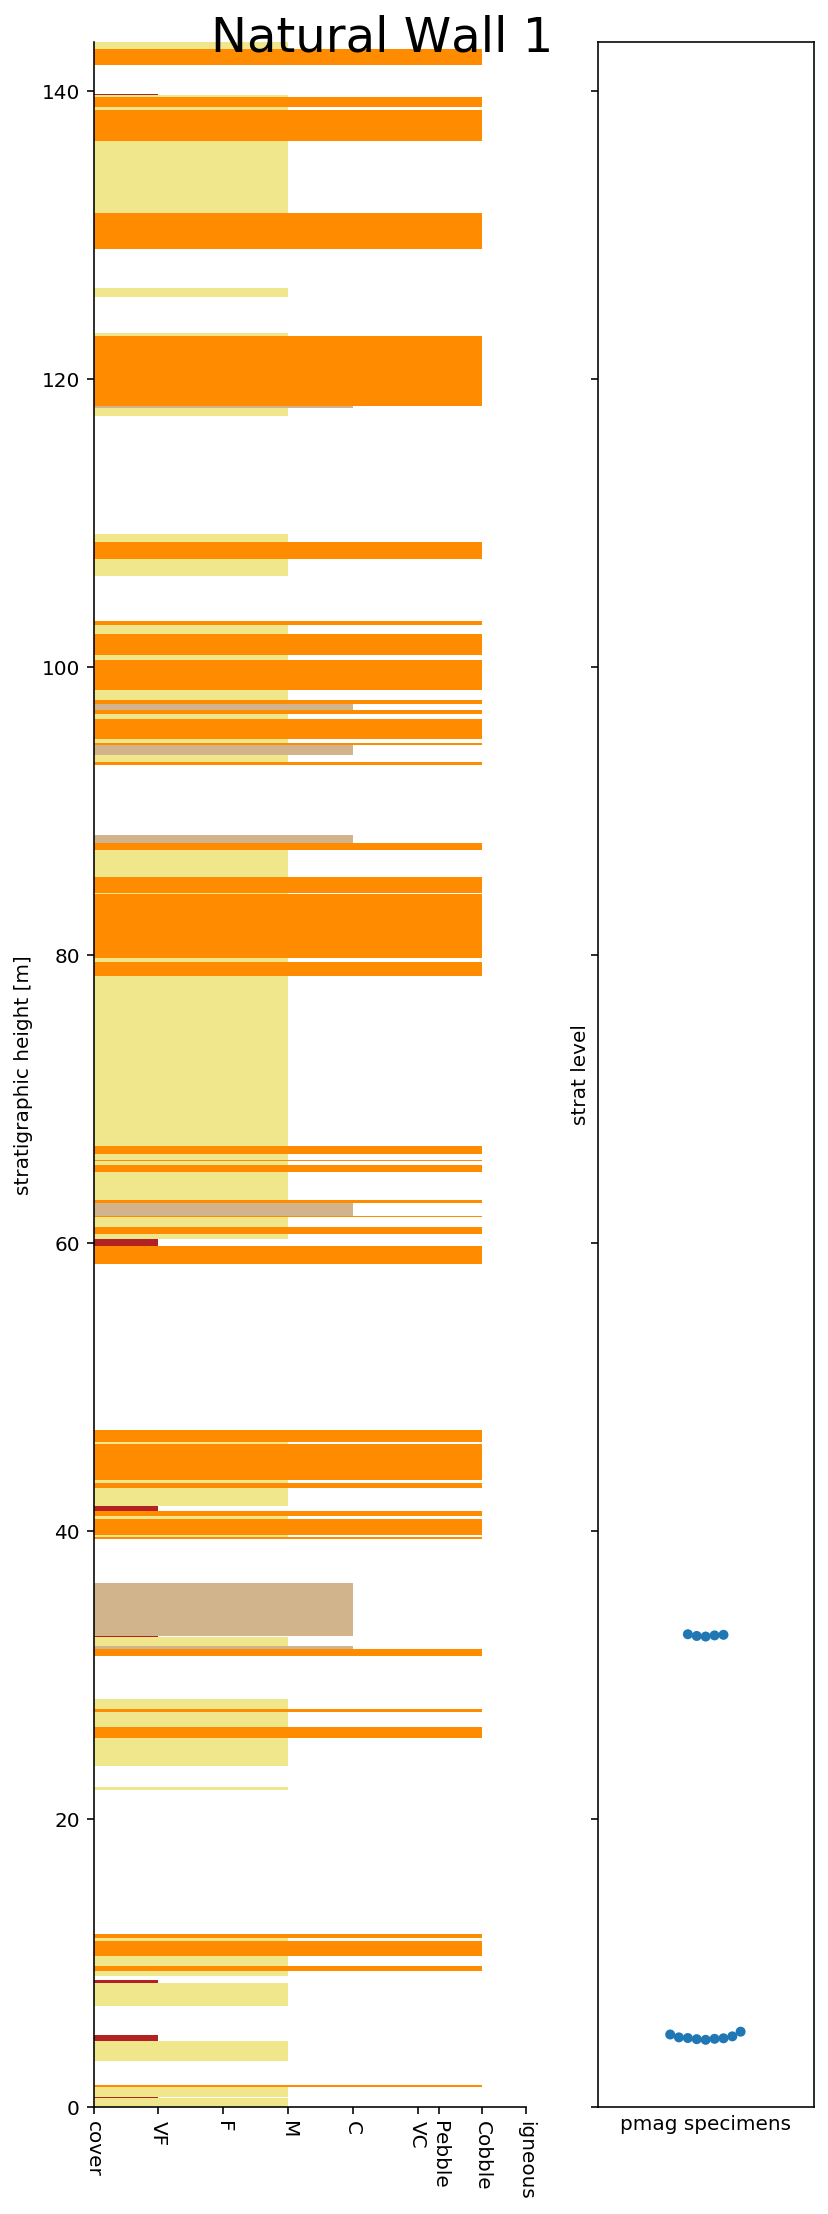

In [11]:
fig, ax = pystrat.plot_stratigraphy(NW1_section, NW1_style, ncols = 2, linewidth=0., col_widths=0.5)

ax[0].set_xticks(widths)
ax[0].set_xticklabels(grain_size)
ax[0].grid(False)

sns.swarmplot(y = NW1_specimen_level['strat_level'], ax = ax[1])

ax[1].set_xlabel('pmag specimens')
ax[1].set_ylabel('strat level')

ax[1].set_xticks([])
fig.suptitle('Natural Wall 1', fontsize=24)
plt.savefig('../Figures/NW1_strat.pdf', bbox_inches='tight')
plt.show()

stratigraphic height scaling : 1 distance unit = 1 inch * 0.1
width value of 1 will be     : 3 inches


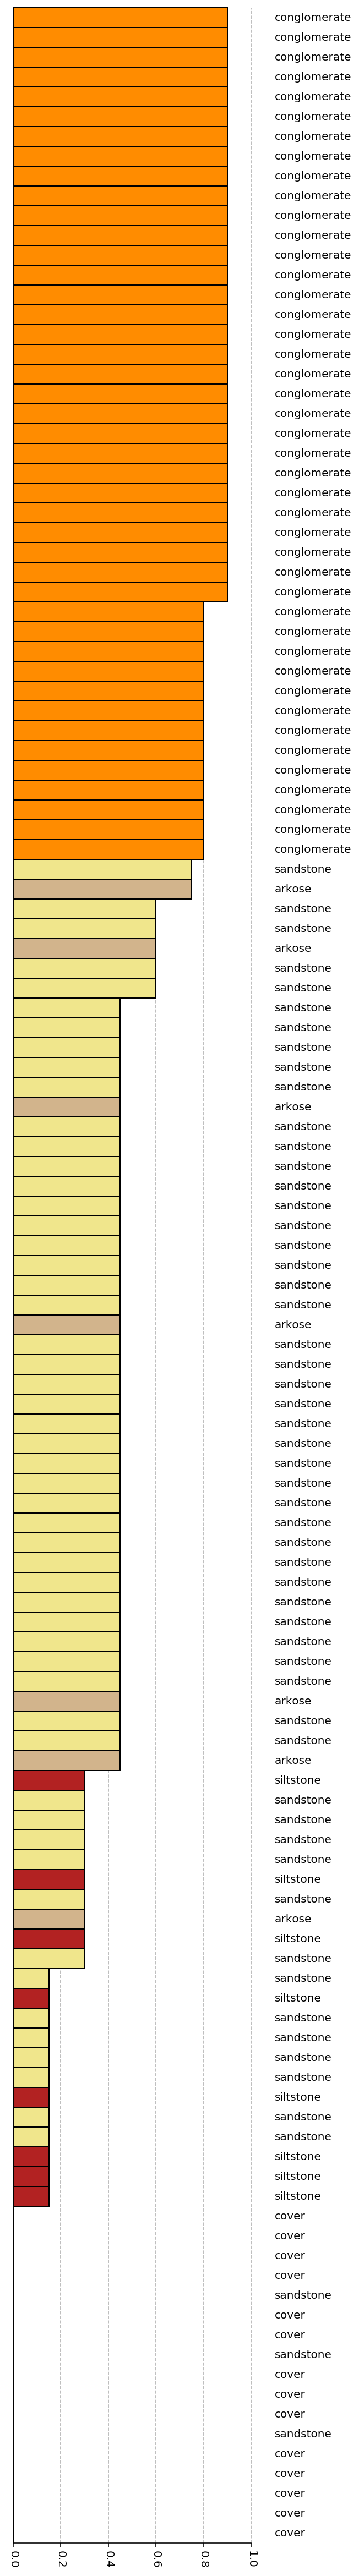

In [12]:
fig, ax = NW1_style.plot_legend()
plt.savefig('../Figures/NW1_legend.pdf', bbox_inches='tight')
plt.show(fig)

## NW2 rough strat column

In [13]:
# create a pystrat Section from the lithostratigraphy data
NW2_section = pystrat.Section(NW2_strat['thickness'], NW2_strat['lithology'])

# create a pystrat Style from the styling files
NW2_style = pystrat.Style('facies',NW2_strat['lithology'],NW2_strat['color'],
                         'facies',NW2_strat['lithology'],NW2_strat['width'],
                         0.1, 3)

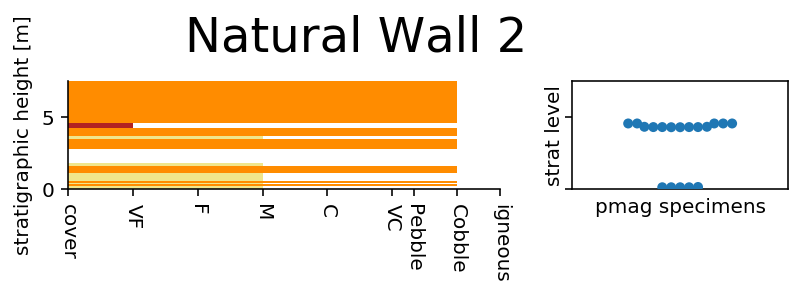

In [14]:
fig, ax = pystrat.plot_stratigraphy(NW2_section, NW2_style, ncols = 2, linewidth=0., col_widths=0.5)

ax[0].set_xticks(widths)
ax[0].set_xticklabels(grain_size)
ax[0].grid(False)

sns.swarmplot(y = NW2_specimen_level['strat_level'], ax = ax[1])

ax[1].set_xlabel('pmag specimens')
ax[1].set_ylabel('strat level')

ax[1].set_xticks([])
fig.suptitle('Natural Wall 2', fontsize=24)

plt.savefig('../Figures/NW2_strat.pdf', bbox_inches='tight')
plt.show()

## AF1 rough strat column

In [15]:
# create a pystrat Section from the lithostratigraphy data
AF1_section = pystrat.Section(AF1_strat['thickness'], AF1_strat['lithology'])

# create a pystrat Style from the styling files
AF1_style = pystrat.Style('facies',AF1_strat['lithology'],AF1_strat['color'],
                         'facies',AF1_strat['lithology'],AF1_strat['width'],
                          0.1, 3)

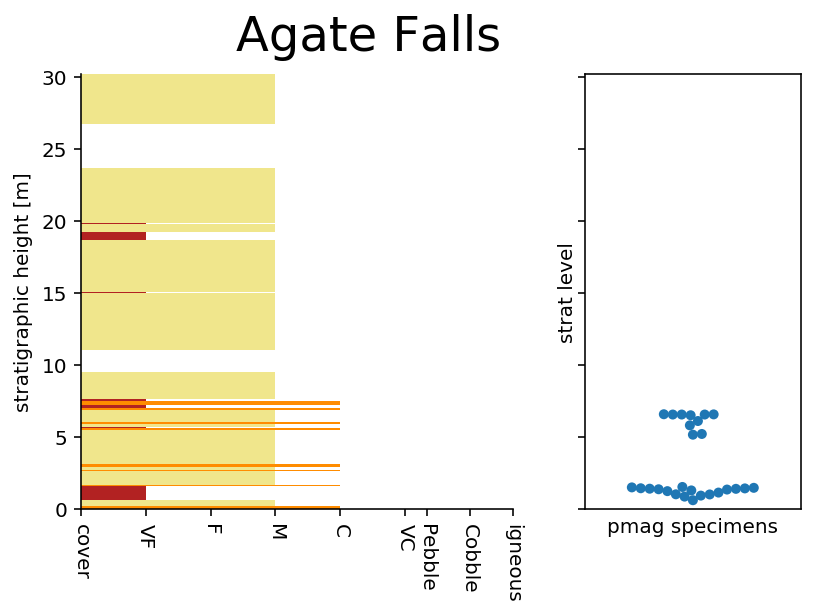

In [16]:
fig, ax = pystrat.plot_stratigraphy(AF1_section, AF1_style, ncols = 2, linewidth=0., col_widths=0.5)

ax[0].set_xticks(widths)
ax[0].set_xticklabels(grain_size)
ax[0].grid(False)

sns.swarmplot(y = AF1_specimen_level['strat_level'], ax = ax[1])

ax[1].set_xlabel('pmag specimens')
ax[1].set_ylabel('strat level')
ax[1].set_xticks([])
fig.suptitle('Agate Falls', fontsize=24)
plt.savefig('../Figures/AF1_strat.pdf', bbox_inches='tight')
plt.show()